Import libary  

In [17]:
# Read dataset
import pandas as pd
import os 
for dirname, _, filenames in os.walk('../App/Covid Data.csv'):
    for filename in filenames: 
        print(os.path.join(dirname, filename))

In [18]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Preprocessing
from sklearn.preprocessing import RobustScaler

In [20]:
# Training model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,  RandomForestClassifier
from sklearn.svm import SVC

In [21]:
# Model evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

In [22]:
# Data balancing
from imblearn.under_sampling import RandomUnderSampler

Overview dataset

In [23]:
df = pd.read_csv("../App/Covid Data.csv")

In [24]:
print("Data shape:" , df.shape) 

Data shape: (1048575, 21)


In [25]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [27]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [28]:
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [29]:
# Number of unique values by columns
for i in df.columns:
    print('{:<20} => {:>10}'.format(i, len(df[i].unique())))
          

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        401
INTUBED              =>          4
PNEUMONIA            =>          3
AGE                  =>        121
PREGNANT             =>          4
DIABETES             =>          3
COPD                 =>          3
ASTHMA               =>          3
INMSUPR              =>          3
HIPERTENSION         =>          3
OTHER_DISEASE        =>          3
CARDIOVASCULAR       =>          3
OBESITY              =>          3
RENAL_CHRONIC        =>          3
TOBACCO              =>          3
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


In [30]:
# Percentage of missing values
for i in df.columns :
    print('{:<20} => {:>10.2f}%'.format(i, len(df[(df[i]==98) | (df[i]==99) | (df[i]==97)])/len(df)*100))
          

USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
AGE                  =>       0.03%
PREGNANT             =>      50.28%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      81.64%


In [31]:
df.DATE_DIED.value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [32]:
df.PNEUMONIA.value_counts()

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

Data preprocessing

In [33]:
# Getting rid of the missing values of features except "INTUBED", "PREGNANT", "ICU"
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for i in cols :
    df = df[(df[i] == 1)|(df[i] == 2)]

In [34]:
# Preaparing "DATE_DIED" column
df['DEATH'] = [2 if row == "9999-99-99" else 1 for row in df.DATE_DIED]

df['DEATH'].value_counts()

DEATH
2    950438
1     74714
Name: count, dtype: int64

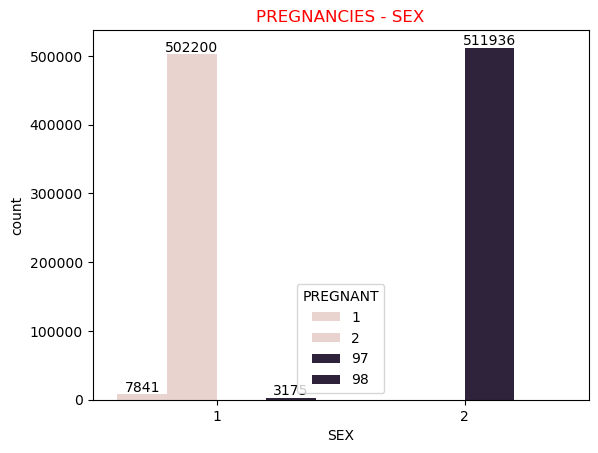

In [35]:
# Pregnant-Sex Bar Plot
plt.figure()
ax = sns.countplot(x = df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");

In [36]:
# Converting process according to inference above
df.PREGNANT = df.PREGNANT.replace(97,2)

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

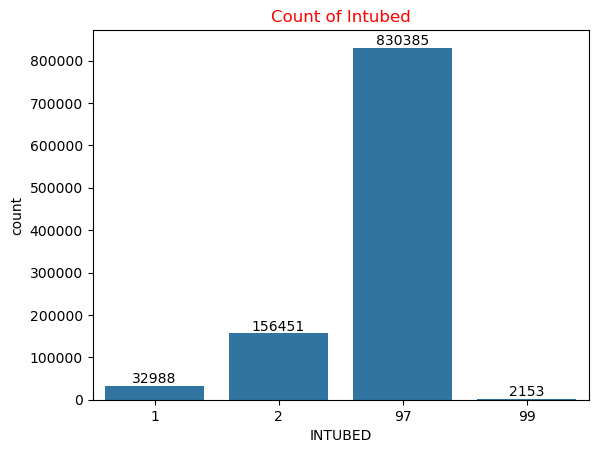

In [37]:
# Missing value analysis of "INTUBED" feature
ax = sns.countplot(x = df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed",color="red");

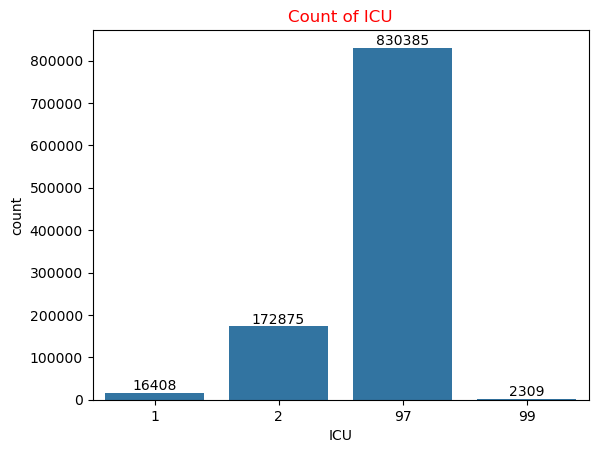

In [38]:
# Missing value analysis of "ICU" feature
ax = sns.countplot(x = df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU",color="red");

In [39]:
# Droping the columns
df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

In [40]:
# Number of unique values by columns
for i in df.columns:
    print('{:<20} => {:>10}'.format(i, len(df[i].unique())))
          

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
PNEUMONIA            =>          2
AGE                  =>        121
PREGNANT             =>          2
DIABETES             =>          2
COPD                 =>          2
ASTHMA               =>          2
INMSUPR              =>          2
HIPERTENSION         =>          2
OTHER_DISEASE        =>          2
CARDIOVASCULAR       =>          2
OBESITY              =>          2
RENAL_CHRONIC        =>          2
TOBACCO              =>          2
CLASIFFICATION_FINAL =>          7
DEATH                =>          2


Data visualization 

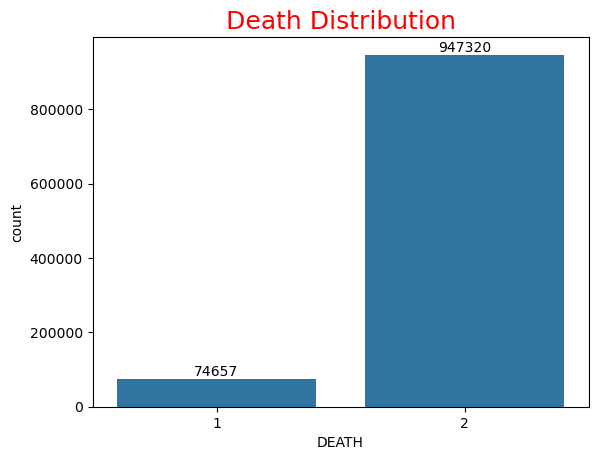

In [41]:
ax = sns.countplot(x=df.DEATH)
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

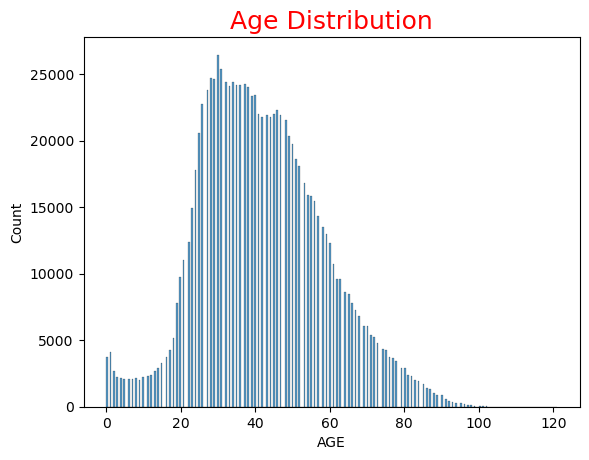

In [42]:
sns.histplot(x=df.AGE)
plt.title("Age Distribution", color="red", fontsize=18);

C:\Users\leanh\AppData\Local\Temp\ipykernel_15488\2617490658.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH", y="AGE",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))


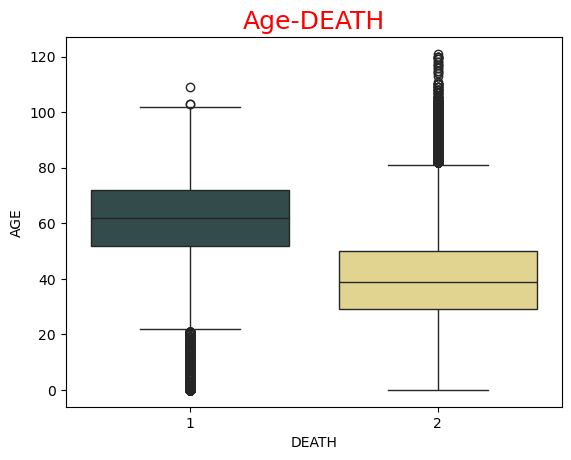

In [43]:
sns.boxplot(x="DEATH", y="AGE",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-DEATH",fontsize=18, color="red");

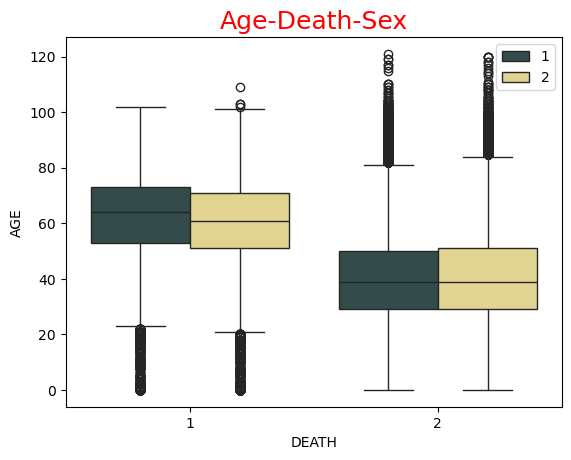

In [44]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best");

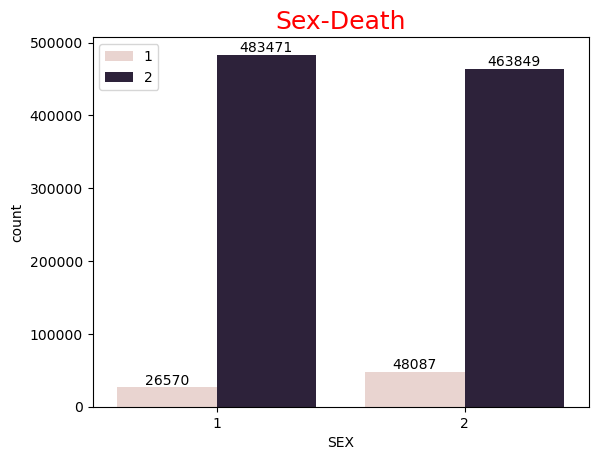

In [45]:
ax=sns.countplot(x=df.SEX,hue=df.DEATH)
plt.title("Sex-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

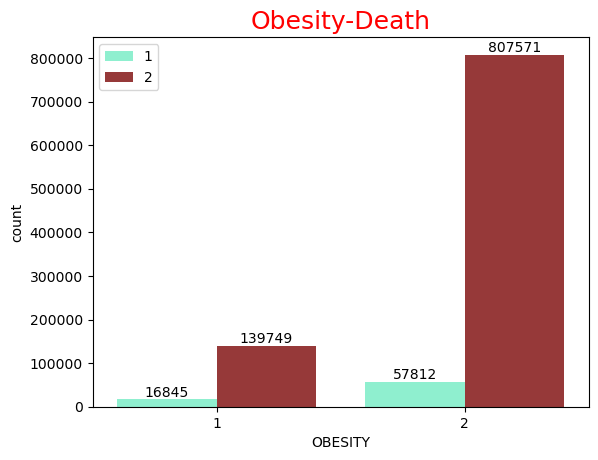

In [46]:
ax=sns.countplot(x=df.OBESITY,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

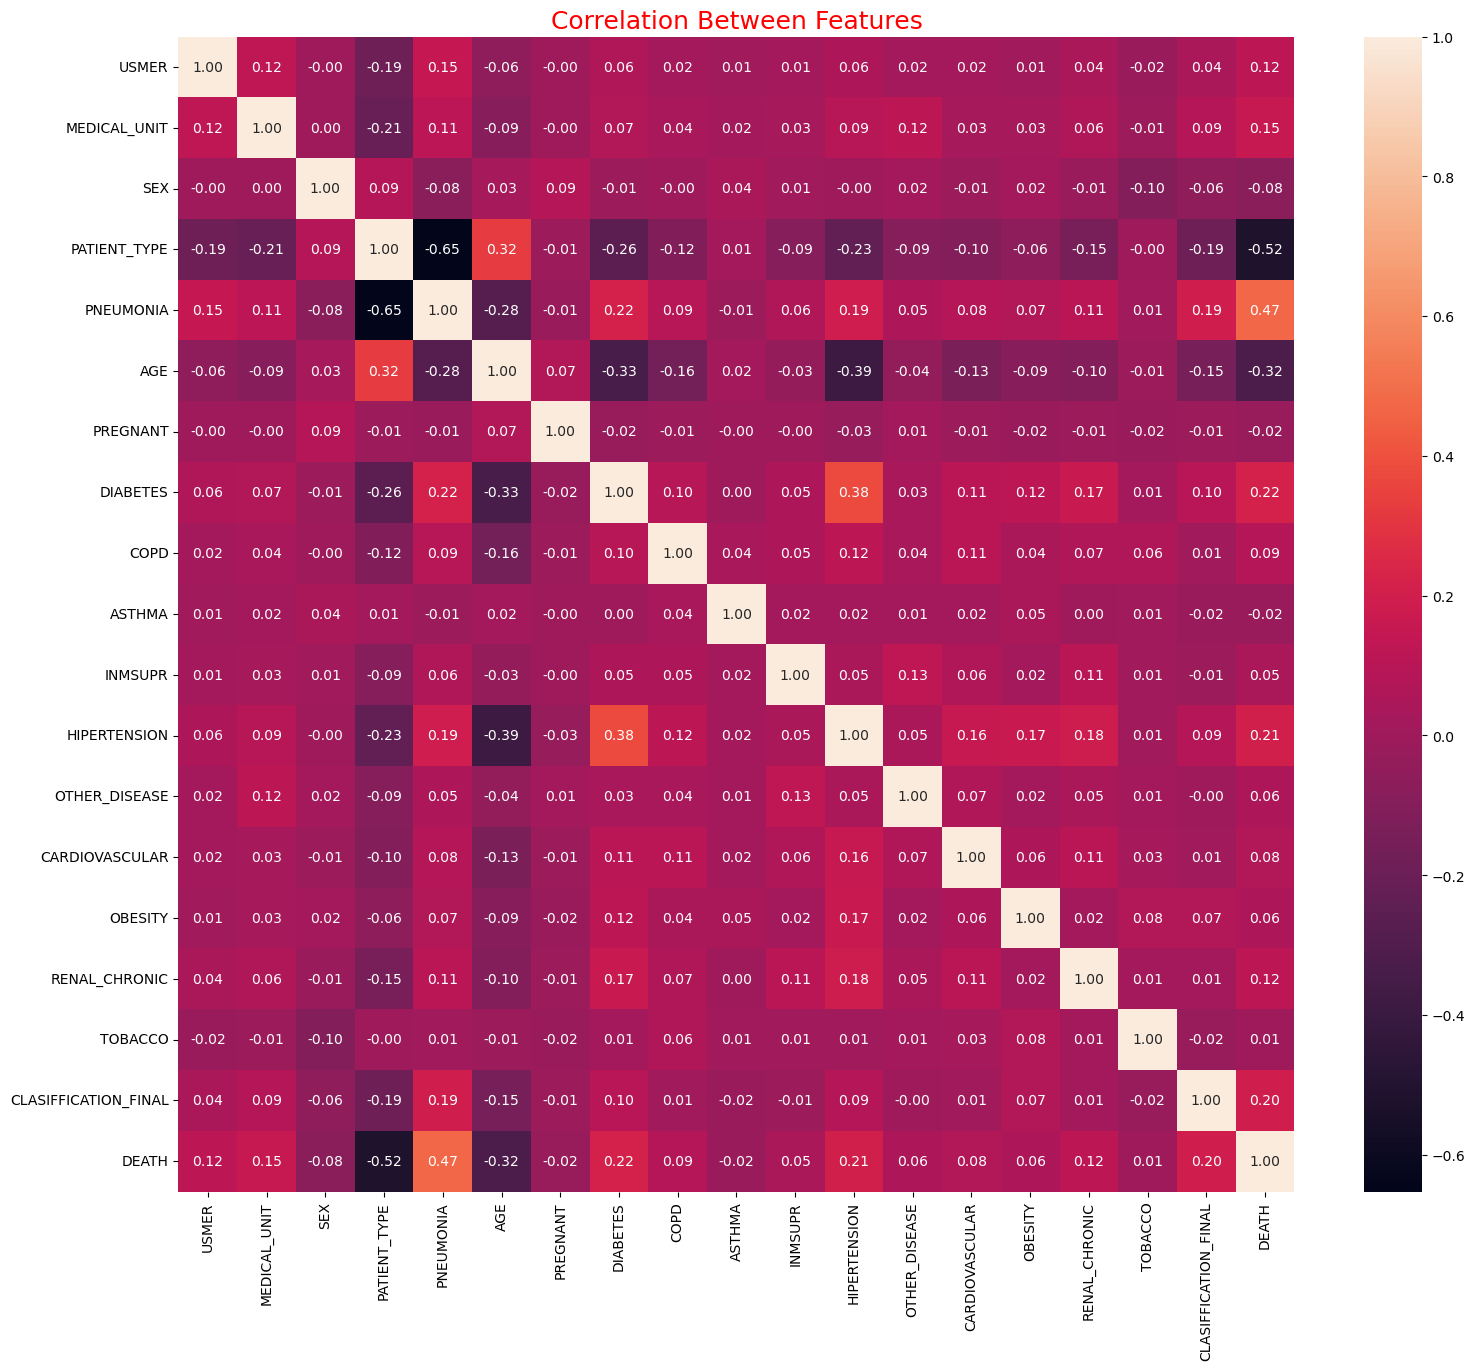

In [47]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

Features selection

In [48]:
#  Droping the features that have low correlation with "DEATH" feature.
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

In [49]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [50]:
df.CLASIFFICATION_FINAL.value_counts()

CLASIFFICATION_FINAL
7    488706
3    377378
6    117342
5     25245
1      8417
4      3088
2      1801
Name: count, dtype: int64

In [51]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)
df.CLASIFFICATION_FINAL.value_counts()

CLASIFFICATION_FINAL
2    634381
1    387596
Name: count, dtype: int64

In [52]:
df.CLASIFFICATION_FINAL.value_counts()

CLASIFFICATION_FINAL
2    634381
1    387596
Name: count, dtype: int64

In [ ]:
# Scaling the numeric features
# scaler = RobustScaler()
# df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

Train test split

In [53]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

Resampling imbalance dataset


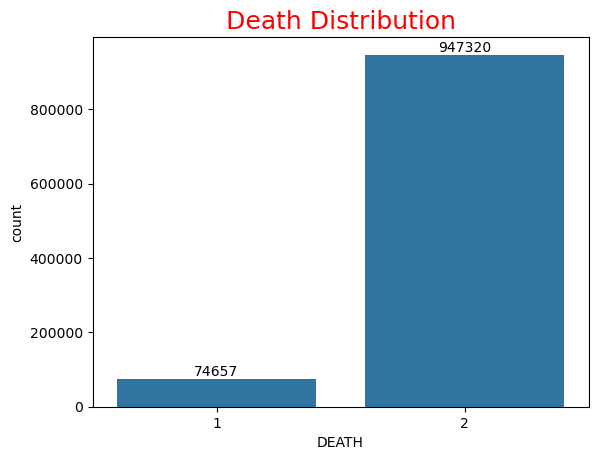

In [54]:
ax = sns.countplot(x=df.DEATH)
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

In [55]:
rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

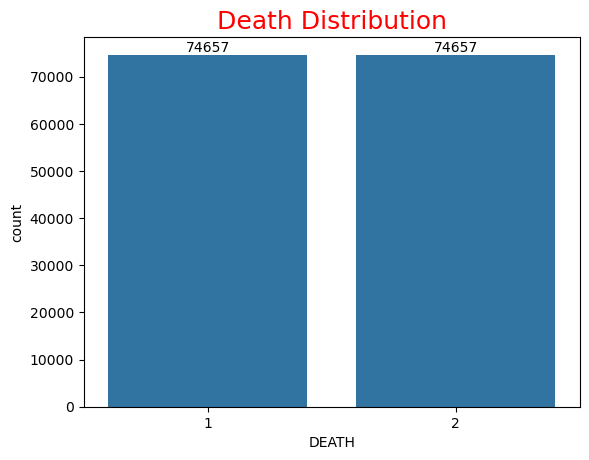

In [56]:
ax = sns.countplot(x=y_resampled)
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

Train val test split after undersampling

In [57]:
# Bước 1: Chia dữ liệu thành tập train_val và tập test
train_val_x, test_x, train_val_y, test_y = train_test_split(x_resampled, y_resampled, test_size=0.20, random_state=42)

# Bước 2: Chia tập train_val thành tập train và validation
# (test_size=0.1875 tương đương 15% dữ liệu gốc)
train_x, val_x, train_y, val_y = train_test_split(train_val_x, train_val_y, test_size=0.1875, random_state=42)

# In kích thước của các tập
print("Train_x ", train_x.shape)
print("Train_y ", train_y.shape)
print("Val_x:", val_x.shape)
print("Val_y:", val_y.shape)
print("Test_x:", test_x.shape)
print("Test_y:", test_y.shape)

Train_x  (97053, 9)
Train_y  (97053,)
Val_x: (22398, 9)
Val_y: (22398,)
Test_x: (29863, 9)
Test_y: (29863,)


Training Model (Gradient Boosting Classifier)

In [58]:
# Tạo và train model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(train_x, train_y)

GradientBoostingClassifier(random_state=42)

In [59]:
# Đánh giá độ chính xác
print("Gradient Boosting Accuracy:", gb_model.score(test_x, test_y))

# Đánh giá F1 Score
print("Gradient Boosting F1 Score:", f1_score(test_y, gb_model.predict(test_x), average=None))

Gradient Boosting Accuracy: 0.911696748484747
Gradient Boosting F1 Score: [0.914674   0.90850422]


In [60]:
# Đánh giá độ chính xác
print("Gradient Boosting Accuracy:", gb_model.score(test_x, test_y))

# Đánh giá F1 Score
print("Gradient Boosting F1 Score:", f1_score(test_y, gb_model.predict(test_x), average=None))

Gradient Boosting Accuracy: 0.911696748484747
Gradient Boosting F1 Score: [0.914674   0.90850422]


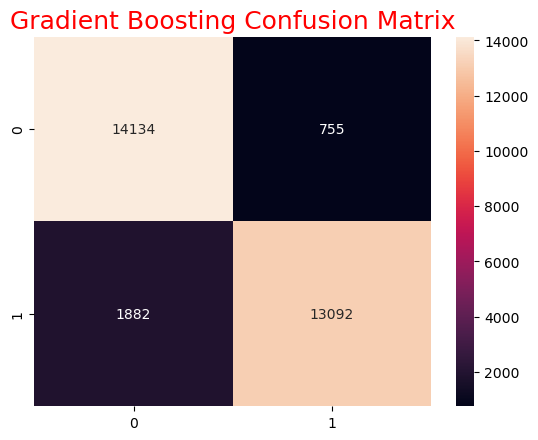

In [61]:
# Vẽ confusion matrix
sns.heatmap(confusion_matrix(test_y, gb_model.predict(test_x)), annot=True, fmt=".0f")
plt.title("Gradient Boosting Confusion Matrix", fontsize=18, color="red")
plt.show()

In [62]:
# In classification report
gb_model_report = classification_report(test_y, gb_model.predict(test_x))
print(gb_model_report)

              precision    recall  f1-score   support

           1       0.88      0.95      0.91     14889
           2       0.95      0.87      0.91     14974

    accuracy                           0.91     29863
   macro avg       0.91      0.91      0.91     29863
weighted avg       0.91      0.91      0.91     29863



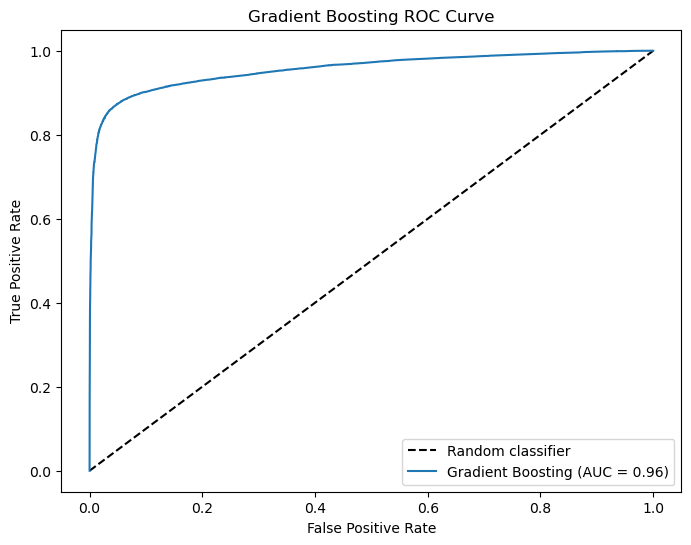

In [63]:
# Chuyển đổi nhãn cho ROC curve
test_y_roc = test_y.replace({2:1, 1:0})

# Xác suất dự đoán
gb_pred_proba = gb_model.predict_proba(test_x)

# Tính toán và vẽ ROC curve
fpr, tpr, thresholds = roc_curve(test_y_roc, gb_pred_proba[:,1])
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], "k--", label="Random classifier")
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve")
plt.legend()
plt.show()

Test model

In [80]:
# Thử nghiệm với mẫu mới
new_sample = [[2, 1, 1, 2, 55, 2, 2, 2, 1]]
df_newSample = pd.DataFrame(new_sample)
df_newSample.columns = x.columns
pred = gb_model.predict(df_newSample)[0]
print(pred)
if pred == 1:
    print("Tỉ lệ tử vong cao")
else: 
    print("Tỉ lệ tử vong thấp")

2
Tỉ lệ tử vong thấp


Compare models accuracy

In [71]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(train_x, train_y)

LogisticRegression(max_iter=1000, random_state=42)

In [70]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(random_state=42)

In [69]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [73]:
nb_model = GaussianNB()
nb_model.fit(train_x, train_y)

GaussianNB()


Model Performance Comparison:
                 Model  Accuracy
4    Gradient Boosting  0.911697
0  Logistic Regression  0.903426
2        Random Forest  0.902622
1        Decision Tree  0.900077
3          Naive Bayes  0.894585


C:\Users\leanh\AppData\Local\Temp\ipykernel_15488\700000094.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=models_comparison, palette='viridis')


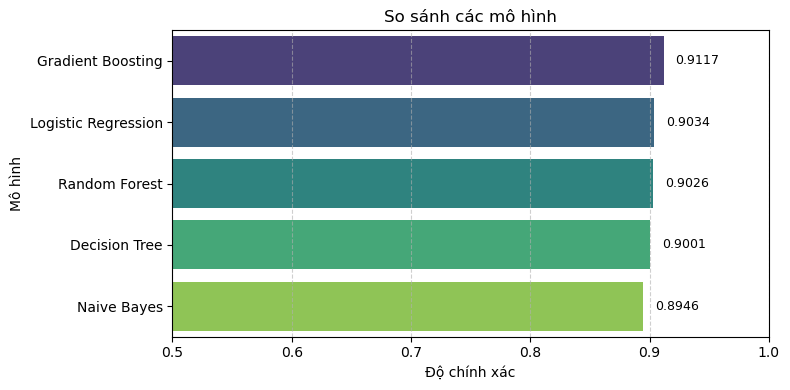

In [75]:
# Compare models on test set
print("\nModel Performance Comparison:")
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 
             'Random Forest', 'Naive Bayes', 'Gradient Boosting'],
    'Accuracy': [
        lr_model.score(test_x, test_y),
        dt_model.score(test_x, test_y),
        rf_model.score(test_x, test_y),
        nb_model.score(test_x, test_y),
        gb_model.score(test_x, test_y)
    ]
})

# Sort by accuracy
models_comparison = models_comparison.sort_values(by='Accuracy', ascending=False)
print(models_comparison)

# Biểu đồ so sánh các mô hình nhỏ gọn hơn
plt.figure(figsize=(8, 4))  # Kích thước nhỏ hơn
sns.barplot(x='Accuracy', y='Model', data=models_comparison, palette='viridis')

# Điều chỉnh tiêu đề và nhãn
plt.title('So sánh các mô hình', fontsize=12)
plt.xlabel('Độ chính xác', fontsize=10)
plt.ylabel('Mô hình', fontsize=10)

# Thêm giá trị lên thanh
for i, v in enumerate(models_comparison['Accuracy']):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center', fontsize=9)

plt.xlim(0.5, 1.0)  # Giới hạn trục x từ 0.5-1.0 để thấy rõ sự khác biệt
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Thêm lưới để dễ đọc
plt.tight_layout()
plt.show()

Save Model

In [76]:
# Tinh chỉnh tham số cho Gradient Boosting
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(train_x, train_y)

print("Tham số tốt nhất:", grid_search.best_params_)
print("Độ chính xác tốt nhất:", grid_search.best_score_)

# Sử dụng mô hình tốt nhất
best_gb_model = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tham số tốt nhất: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Độ chính xác tốt nhất: 0.9146960591161377


In [77]:
import joblib
joblib.dump(best_gb_model, open('grand_boost_covid.sav', 'wb'))